In [119]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr

In [120]:
df=pd.read_csv('C:/Users/eldiy/Documents/Applications/Ironhack/test/exercises/data/housing_prices.csv')

In [121]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Cleaning

In [123]:
nacol=df.isna().sum()
round((nacol[nacol>0]/df.shape[0]*100),2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [124]:
df.Fence=df.Fence.fillna(0)
df.LotFrontage=df.LotFrontage.fillna(0)

In [125]:
df.drop(['MiscFeature','PoolQC','Alley'],axis=1,inplace=True)

In [126]:
nacol=df.isna().sum()
round((nacol[nacol>0]/df.shape[0]*100),2)

MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
dtype: float64

In [127]:
print([i for i in df.columns if i not in df._get_numeric_data().columns])

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']


In [128]:
#df.MSZoning.value_counts()
df[['MSZone_FV','MSZone_RH',"MSZone_RL",'MSZone_RM']]=pd.get_dummies(df.MSZoning, drop_first=True, prefix='MSZone')

In [129]:
df._get_numeric_data().columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'MSZone_FV', 'MSZone_RH',
       'MSZone_RL', 'MSZone_RM'],
      dtype='object')

In [130]:
#df.Street.unique()
df['Pave']=[1 if i=='Pave' else 0 for i in df.Street ]

In [131]:
df.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [132]:
df.Pave.value_counts()

1    1454
0       6
Name: Pave, dtype: int64

In [133]:
df.drop(['Pave','Street'],axis=1,inplace=True)

In [134]:
df.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [135]:
labels=df.LotShape.unique().tolist()
n_lotshape=dict(zip(labels,range(len(labels))))
df.replace({'LotShape': n_lotshape},inplace=True)

In [136]:
df.LotShape.value_counts()

0    925
1    484
2     41
3     10
Name: LotShape, dtype: int64

In [137]:
df.LandContour.value_counts()
df.drop('LandContour',axis=1,inplace=True)

In [138]:
df.Utilities.value_counts()
df.drop('Utilities',axis=1,inplace=True)

In [139]:
df.LotConfig.value_counts()
lotconf=pd.get_dummies(df.LotConfig, drop_first=True, prefix='lotconf')

In [140]:
df.Neighborhood.value_counts()
nbhd=pd.get_dummies(df.Neighborhood, drop_first=True, prefix='Neighborhood')

In [141]:
df.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [142]:
df.drop(['MSZoning','LotConfig','LandSlope','Condition1','Condition2'],axis=1,inplace=True)

In [143]:
print([i for i in df.columns if i not in df._get_numeric_data().columns])

['Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']


In [144]:
round(df.SaleType.value_counts()/df.shape[0]*100,2)
round(df.SaleCondition.value_counts()/df.shape[0]*100,2)

Normal     82.05
Partial     8.56
Abnorml     6.92
Family      1.37
Alloca      0.82
AdjLand     0.27
Name: SaleCondition, dtype: float64

In [145]:
df1=pd.concat([df,lotconf,nbhd],axis=1)

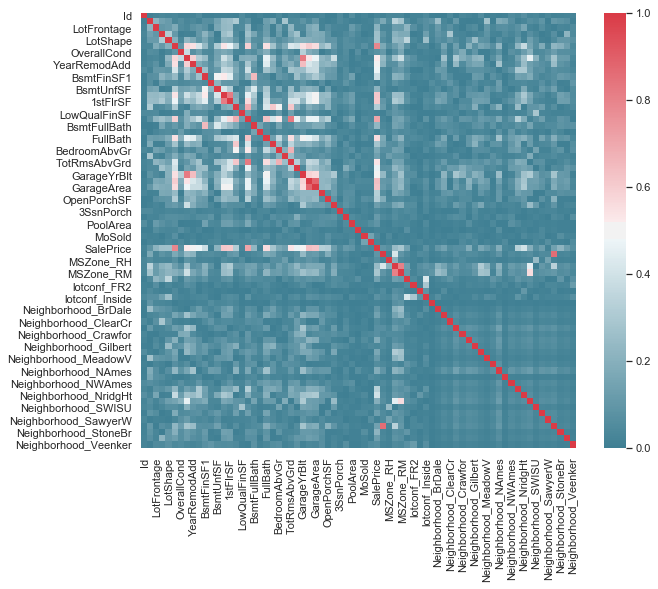

In [146]:
df1c=abs(df1.corr())
f,ax=plt.subplots(figsize=(10,8))
sns.heatmap(df1c,cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax)


In [147]:
df1c.SalePrice[df1c.SalePrice>0.4]

OverallQual             0.790982
YearBuilt               0.522897
YearRemodAdd            0.507101
MasVnrArea              0.477493
TotalBsmtSF             0.613581
1stFlrSF                0.605852
GrLivArea               0.708624
FullBath                0.560664
TotRmsAbvGrd            0.533723
Fireplaces              0.466929
GarageYrBlt             0.486362
GarageCars              0.640409
GarageArea              0.623431
SalePrice               1.000000
Neighborhood_NridgHt    0.402149
Name: SalePrice, dtype: float64

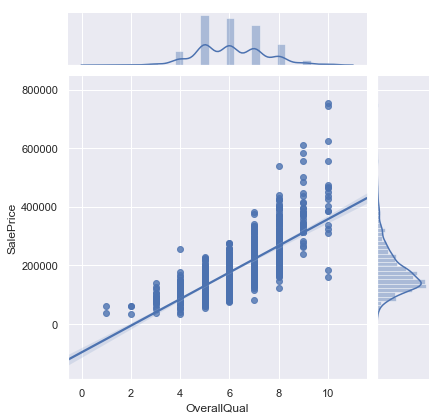

In [148]:
sns.jointplot(y='SalePrice',x='OverallQual',data=df1, kind='reg')

In [149]:
labels=df1.Neighborhood.unique().tolist()
n_nbgh=dict(zip(labels,range(len(labels))))
df1.replace({'Neighborhood': n_nbgh},inplace=True)

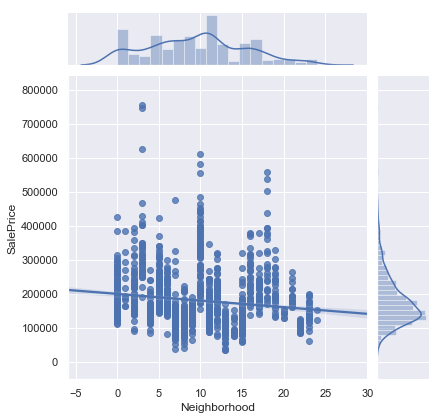

In [150]:
sns.jointplot(y='SalePrice',x='Neighborhood',data=df1, kind='reg')

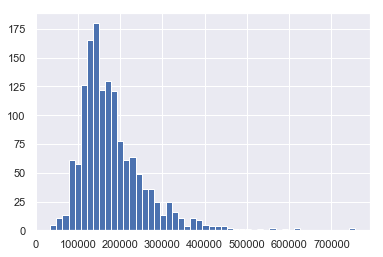

In [151]:
df1.SalePrice.hist(bins=50)

In [152]:
def outliers_modified_z_score(ys): #outliers using z-score method
    threshold = 3.5
    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)


def outliers_iqr(ys): #outliers using iqr method
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

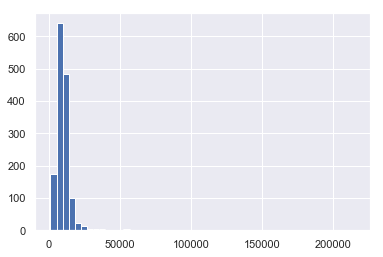

In [153]:
df1.LotArea.hist(bins=50)

In [154]:
tot_outliers=pd.DataFrame()

C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

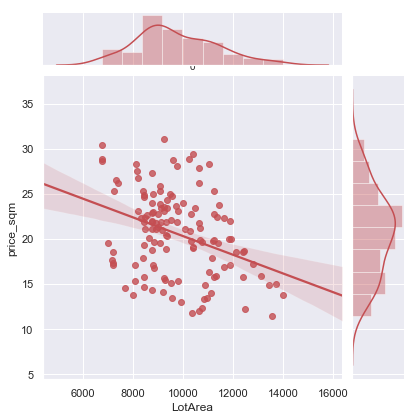

     LotArea  price_sqm outtype
Id                             
140    15426  15.007131     sqm
291    15611  14.940106     sqm
302    16226  16.455072     sqm
783    16285  11.489100     sqm
848    15523   8.600142     sqm
      LotArea  price_sqm outtype
Id                              
140     15426  15.007131     sqm
204      4438  33.573682     sqm
291     15611  14.940106     sqm
302     16226  16.455072     sqm
594      4435  31.567080     sqm
691      4426  31.857207     sqm
722      4426  32.309083     sqm
783     16285  11.489100     sqm
812      4438  32.559712     sqm
848     15523   8.600142     sqm
851      4435  29.650507     sqm
1079     4435  35.152198     sqm
1319    14781  18.604966     sqm
1369     4435  32.468997     sqm
1423     4435  30.777903     sqm
1442     4426  33.732490     sqm
      LotArea  price_sqm outtype
Id                              
1143     9965  42.636227   price
      LotArea  price_sqm outtype
Id                              
113      9965  38

C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

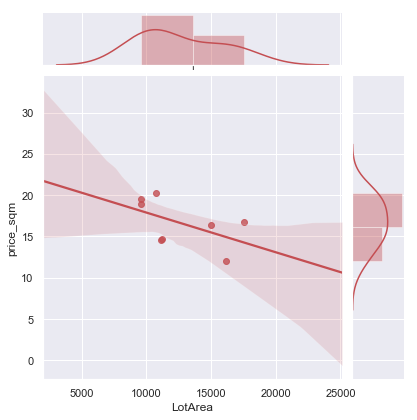

    LotArea  price_sqm outtype
Id                            
54    50271   7.658491     sqm
    LotArea  price_sqm outtype
Id                            
54    50271   7.658491     sqm
     LotArea  price_sqm outtype
Id                             
327    10846  29.872764   price
765     9549  28.275212   price
      price_sqm  LotArea     resid
Id                                
850   19.479167     9600  7.703849
2     18.906250     9600  7.130933
1156  20.245171    10768  7.037190
161   14.613309    11120  0.973567
673   14.666667    11250  0.867467
161   14.613309    11120  0.973567
673   14.666667    11250  0.867467
401   16.407138    14963 -1.946412
1254  16.759777    17542 -4.757163
1165  12.007180    16157 -7.810925


C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

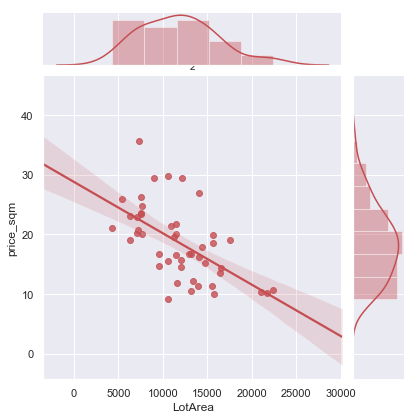

     LotArea  price_sqm outtype
Id                             
530    32668     6.1413     sqm
     LotArea  price_sqm outtype
Id                             
530    32668     6.1413     sqm
      LotArea  price_sqm outtype
Id                              
252      4750  49.473684   price
1182     5587  70.252372   price
1406     3842  71.577303   price
      LotArea  price_sqm outtype
Id                              
252      4750  49.473684   price
1182     5587  70.252372   price
1406     3842  71.577303   price
      price_sqm  LotArea      resid
Id                                 
115   35.748726     7259  26.280609
1275  25.923163     5362  18.929356
1458  29.473568     9042  17.679834
182   26.370585     7588  16.473344
191   29.801325    10570  16.014578
408   11.363636    15576  -8.952577
301    9.968254    15750 -10.574912
114   10.333333    21000 -17.057555
727   10.232773    21695 -18.064623
418   10.660125    22420 -18.582909


C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

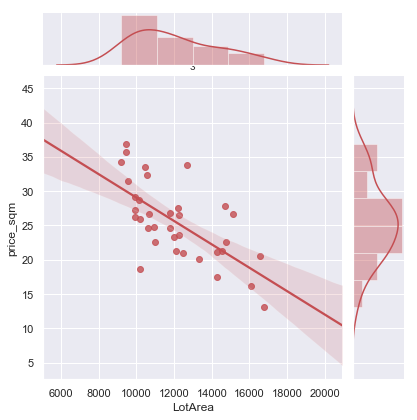

      LotArea  price_sqm outtype
Id                              
662     46589   8.628646     sqm
1058    29959   8.277980     sqm
1170    35760  17.477629     sqm
      LotArea  price_sqm outtype
Id                              
662     46589   8.628646     sqm
692     21535  35.059206     sqm
1058    29959   8.277980     sqm
1170    35760  17.477629     sqm
      LotArea  price_sqm outtype
Id                              
1183    15623  47.686104   price
1374    11400  40.921053   price
      price_sqm  LotArea      resid
Id                                 
991   36.817605     9452  17.922633
764   35.737010     9430  16.886017
424   34.239130     9200  15.847918
655   33.534541    10437  12.670510
1313  31.550355     9572  12.415498
1033  21.319029    14541  -7.749081
5     17.531557    14260 -10.974822
1418  20.550015    16545 -12.524181
86    16.190298    16059 -15.912362
685   13.178295    16770 -20.345687


C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

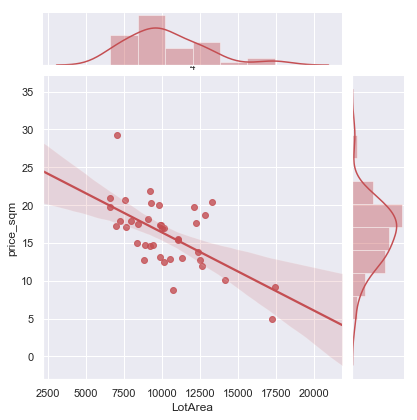

      LotArea  price_sqm outtype
Id                              
877     25286   5.230167     sqm
944     25000   5.720000     sqm
1191    32463   5.175122     sqm
1447    26142   6.040089     sqm
      LotArea  price_sqm outtype
Id                              
423     21750   5.195402     sqm
877     25286   5.230167     sqm
944     25000   5.720000     sqm
1049    21750   5.287356     sqm
1191    32463   5.175122     sqm
1447    26142   6.040089     sqm
      LotArea  price_sqm outtype
Id                              
82       4500  34.111111   price
484      4500  36.444444   price
776      4500  36.000000   price
1194     4500  36.666667   price
      LotArea  price_sqm outtype
Id                              
82       4500  34.111111   price
484      4500  36.444444   price
776      4500  36.000000   price
1194     4500  36.666667   price
      price_sqm  LotArea      resid
Id                                 
421   29.220963     7060  19.150857
593   20.909091     6600  11.49511

C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

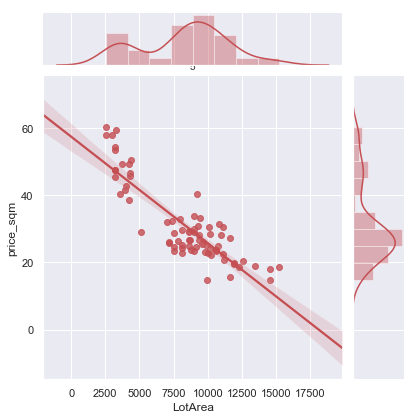

     LotArea  price_sqm outtype
Id                             
665    20896  20.243109     sqm
     LotArea  price_sqm outtype
Id                             
665    20896  20.243109     sqm
      LotArea  price_sqm outtype
Id                              
57       2645  65.217391   price
181      2117  83.608880   price
624      2117  79.593765   price
759      2280  78.684211   price
886      5119  64.250830   price
976      2651  62.240664   price
1092     2160  74.074074   price
1192     2645  65.784499   price
1359     2117  83.845064   price
      LotArea  price_sqm outtype
Id                              
181      2117  83.608880   price
624      2117  79.593765   price
759      2280  78.684211   price
1359     2117  83.845064   price
      price_sqm  LotArea      resid
Id                                 
960   60.264386     2572  52.830870
830   57.940252     2544  50.587661
1090  59.408926     3316  49.825125
915   57.911000     3000  49.240492
116   54.489164     3230  45.15

C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

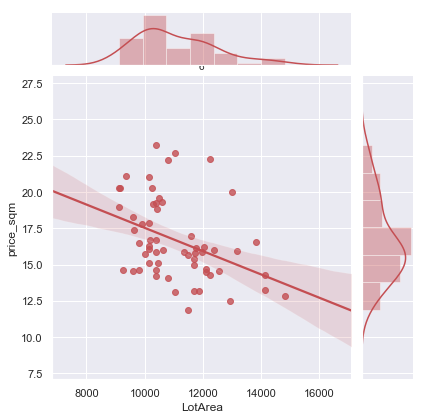

      LotArea  price_sqm outtype
Id                              
125     17043  10.620196     sqm
294     16659  14.106489     sqm
365     18800  10.106383     sqm
422     16635  12.924557     sqm
1278    17871  11.073807     sqm
1347    20781  12.631731     sqm
1387    16692  14.977235     sqm
1410    20544  10.465343     sqm
      LotArea  price_sqm outtype
Id                              
125     17043  10.620196     sqm
294     16659  14.106489     sqm
365     18800  10.106383     sqm
422     16635  12.924557     sqm
926     15611  11.210044     sqm
1278    17871  11.073807     sqm
1347    20781  12.631731     sqm
1387    16692  14.977235     sqm
1410    20544  10.465343     sqm
      LotArea  price_sqm outtype
Id                              
633     11900   6.932773   price
746      8963  33.448622   price
1016     8400  27.023810   price
1045     9600  28.958333   price
      LotArea  price_sqm outtype
Id                              
633     11900   6.932773   price
746      8

C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

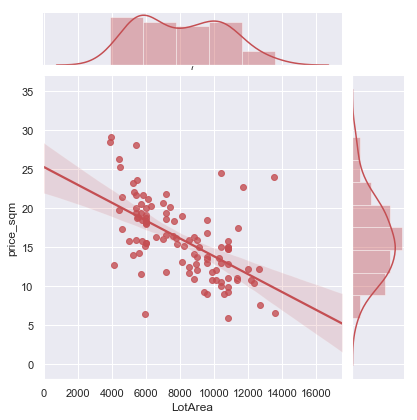

     LotArea  price_sqm outtype
Id                             
186    22950  20.697168     sqm
     LotArea  price_sqm outtype
Id                             
186    22950  20.697168     sqm
305    18386  16.044817     sqm
992    17671   9.507102     sqm
     LotArea  price_sqm outtype
Id                             
426     3378  39.964476   price
483     2500  62.000000   price
     LotArea  price_sqm outtype
Id                             
205     3500  31.428571   price
426     3378  39.964476   price
459     5100  31.568627   price
483     2500  62.000000   price
597     3600  31.806667   price
      price_sqm  LotArea      resid
Id                                 
1178  29.113924     3950  22.366570
242   28.479381     3880  21.851601
165   28.148148     5400  18.923918
437   26.363636     4400  18.847597
49    25.359066     4456  17.747368
580   10.823045    12150  -9.931473
171   10.398123    12358 -10.711700
1433   5.972222    10800 -12.476239
260    7.636593    12702 -14.060

C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


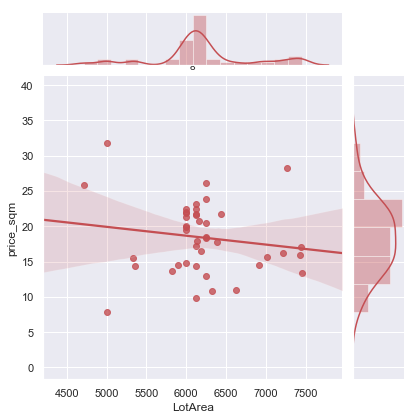

      LotArea  price_sqm outtype
Id                              
78       8635  14.707585     sqm
290      8730  17.591638     sqm
329     11888  18.043405     sqm
362      9144  15.857393     sqm
498      9120  20.175439     sqm
547      8737  24.035710     sqm
587     10267  12.661927     sqm
590      9100   8.736264     sqm
711      4130  12.590799     sqm
714      9873  13.065937     sqm
808     21384  10.451740     sqm
975     11414  14.674961     sqm
1140     8731  16.492956     sqm
1264    13515  13.355531     sqm
1415    13053  15.858423     sqm
1444     8854  13.666140     sqm
      LotArea  price_sqm outtype
Id                              
329     11888  18.043405     sqm
808     21384  10.451740     sqm
1264    13515  13.355531     sqm
1415    13053  15.858423     sqm
      price_sqm  LotArea      resid
Id                                 
523   31.800000     5000  17.151699
996   25.806452     4712  12.001893
443   26.105769     6240   7.824690
276   28.221366     7264   6

C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


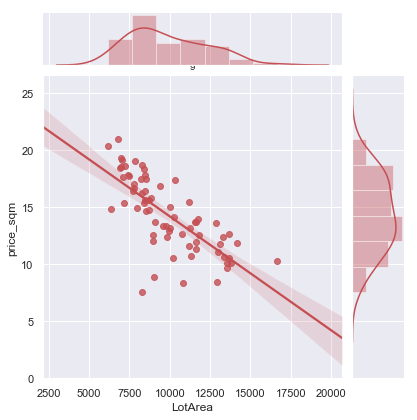

      LotArea  price_sqm outtype
Id                              
1011    21286   6.342197     sqm
1384    25339   4.420064     sqm
      LotArea  price_sqm outtype
Id                              
855     17920   9.486607     sqm
1011    21286   6.342197     sqm
1231    18890  10.058232     sqm
1384    25339   4.420064     sqm
      price_sqm  LotArea      resid
Id                                 
905   20.330471     6173  12.165550
742   20.981087     6768  12.029169
900   19.305019     6993  10.055498
623   19.110985     7064   9.767553
856   18.413803     6897   9.291259
1273  10.128641    13526  -7.761968
1119  10.126582    13825  -8.159509
715    9.654509    13517  -8.224196
1164   8.446434    12900  -8.616176
846   10.272121    16647 -11.746582


C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


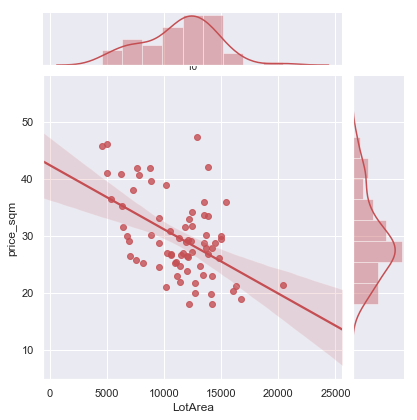

      LotArea  price_sqm outtype
Id                              
349      2448  62.908497   price
972      2268  76.278660   price
1237     2628  66.780822   price
1252     3136  54.767219   price
      LotArea  price_sqm outtype
Id                              
349      2448  62.908497   price
972      2268  76.278660   price
1237     2628  66.780822   price
1252     3136  54.767219   price
      price_sqm  LotArea      resid
Id                                 
632   45.642702     4590  34.888341
1158  45.990802     5001  34.273469
283   40.983607     5063  29.121008
708   40.705128     6240  26.084821
46    41.773309     7658  23.830630
26    18.011244    14230 -15.329618
321   21.074051    16259 -17.020753
481   20.333063    16033 -17.232224
1360  18.820577    16737 -20.394180
350   21.396603    20431 -26.473189


C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

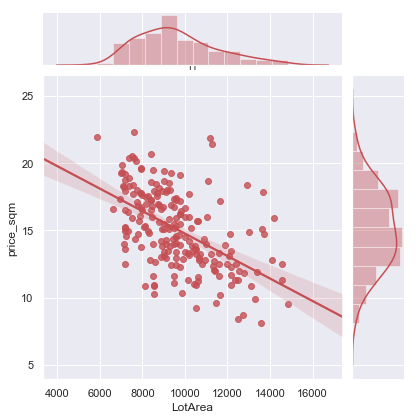

     LotArea  price_sqm outtype
Id                             
67     19900   9.045226     sqm
172    31770   6.767391     sqm
198    25419   9.245053     sqm
261    19296   9.121061     sqm
348    17600   8.948864     sqm
447    16492  11.520737     sqm
659    17503   5.570474     sqm
667    18450   6.991870     sqm
935    27650   8.752260     sqm
      LotArea  price_sqm outtype
Id                              
29      16321  12.713682     sqm
67      19900   9.045226     sqm
172     31770   6.767391     sqm
198     25419   9.245053     sqm
261     19296   9.121061     sqm
348     17600   8.948864     sqm
447     16492  11.520737     sqm
544      4058  32.774766     sqm
659     17503   5.570474     sqm
667     18450   6.991870     sqm
889     15865  16.892531     sqm
935     27650   8.752260     sqm
1078    15870   8.746062     sqm
1265     4060  44.581281     sqm
     LotArea  price_sqm outtype
Id                             
192     7472  24.625268   price
643    13860  24.891775 

C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


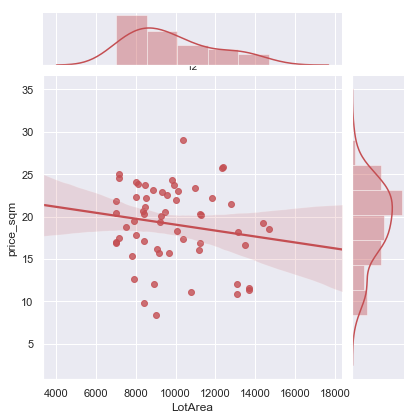

      LotArea  price_sqm outtype
Id                              
1349    16196  13.274883     sqm
      price_sqm  LotArea      resid
Id                                 
1310  25.052426     7153  11.845709
782   24.591081     7153  11.384364
323   28.998073    10380   9.833287
924   24.088867     8012   9.296163
189   21.849102     7018   8.891639
244   11.150344    10762  -8.719736
61    12.086903    13072 -12.048172
1239  10.901163    13072 -13.233913
19    11.610077    13695 -13.675256
1342  11.317999    13695 -13.967333


C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


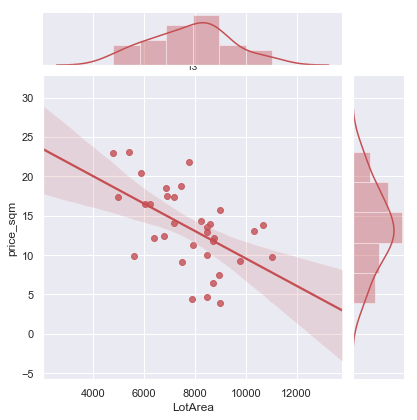

      LotArea  price_sqm outtype
Id                              
297     13710  11.086798     sqm
1062    18000   4.500000     sqm
      LotArea  price_sqm outtype
Id                              
297     13710  11.086798     sqm
1062    18000   4.500000     sqm
1326     3636  15.126513     sqm
      price_sqm  LotArea      resid
Id                                 
802   22.895833     4800  15.237299
1386  23.086829     5436  14.413538
1154  20.458404     5890  11.060744
105   21.848415     7758   9.470308
326   17.400000     5000   9.422360
813    6.427112     8712  -7.473128
558    9.782609    11040  -7.832021
496    4.429496     7879  -8.141669
31     4.705882     8500  -8.856106
917    3.923444     9000 -10.436308


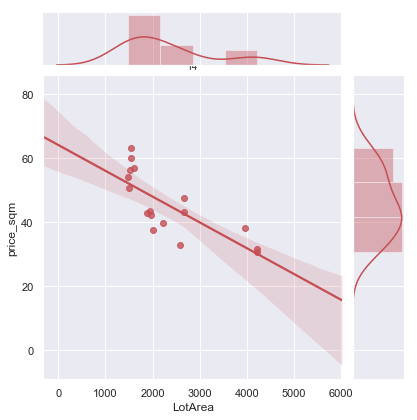

      price_sqm  LotArea      resid
Id                                 
1039  63.274625     1533  39.138314
1450  60.013046     1533  35.876736
490   56.356488     1526  32.330389
76    57.017544     1596  31.889330
1040  54.163846     1477  30.909227
491   43.151970     2665   1.192891
345   32.793210     2592  -8.016521
1069  38.193744     3964 -24.217434
358   31.723485     4224 -34.781261
24    30.752841     4224 -35.751905


C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

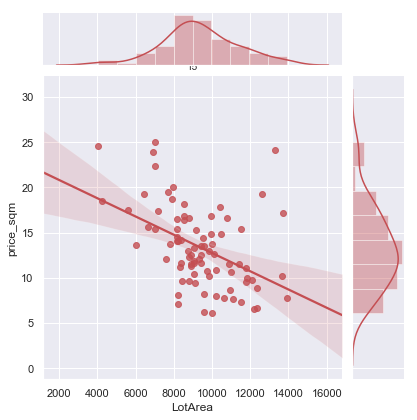

      LotArea  price_sqm outtype
Id                              
524     40094   4.607921     sqm
564     21780   8.494031     sqm
888     16466   8.229078     sqm
918     17140   7.876313     sqm
1152    17755   8.442692     sqm
1299    63887   2.504422     sqm
1424    19690  13.964957     sqm
      LotArea  price_sqm outtype
Id                              
146      2522  51.546392     sqm
194      2522  51.546392     sqm
473      3675  40.272109     sqm
524     40094   4.607921     sqm
564     21780   8.494031     sqm
888     16466   8.229078     sqm
918     17140   7.876313     sqm
1089     2522  54.520222     sqm
1152    17755   8.442692     sqm
1298     3675  38.095238     sqm
1299    63887   2.504422     sqm
1305     3363  38.655962     sqm
1424    19690  13.964957     sqm
1453     3675  39.455782     sqm
     LotArea  price_sqm outtype
Id                             
608     7800  28.846154   price
     LotArea  price_sqm outtype
Id                             
363     7301  2

C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

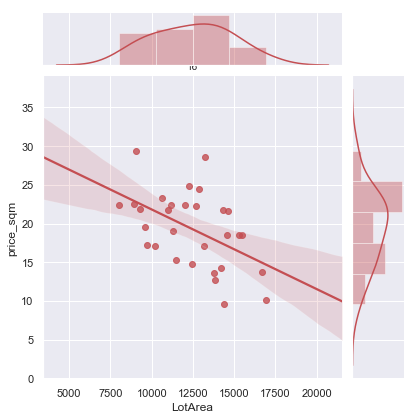

      LotArea  price_sqm outtype
Id                              
314    215245   1.742201     sqm
336    164660   1.390441     sqm
693     26178  12.797005     sqm
1185    35133   5.314092     sqm
1397    57200   2.797203     sqm
      LotArea  price_sqm outtype
Id                              
314    215245   1.742201     sqm
336    164660   1.390441     sqm
693     26178  12.797005     sqm
1185    35133   5.314092     sqm
1397    57200   2.797203     sqm
      LotArea  price_sqm outtype
Id                              
134      6853  32.102729   price
586     11443  32.325439   price
1028     9520  30.785399   price
      price_sqm  LotArea      resid
Id                                 
1240  29.423481     9037  16.176812
1282  22.363026     8049  10.564593
931   22.521008     8925   9.438512
1268  28.643863    13214   9.274438
453   21.928410     9303   8.291831
882   13.628434    13758  -6.538399
696   12.743465    13811  -7.501057
170   13.678085    16669 -10.755768
945    9.5652

C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


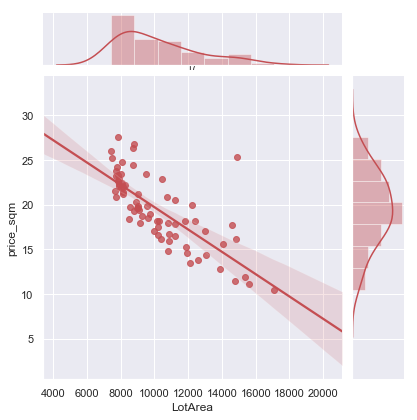

      LotArea  price_sqm outtype
Id                              
412     34650   4.184704     sqm
559     21872   8.001097     sqm
1108    23257  11.812573     sqm
1261    24682   7.333279     sqm
1431    21930   8.761514     sqm
      LotArea  price_sqm outtype
Id                              
160     19378  16.513572     sqm
278     19138   7.367541     sqm
412     34650   4.184704     sqm
559     21872   8.001097     sqm
1108    23257  11.812573     sqm
1261    24682   7.333279     sqm
1431    21930   8.761514     sqm
      price_sqm  LotArea      resid
Id                                 
235   27.576105     7851  13.830026
1402  26.028321     7415  13.045621
1190  25.200000     7500  12.068476
747   26.833428     8795  11.434527
256   26.321813     8738  11.022712
51    12.762276    13869 -11.520539
869   11.448313    14762 -14.398028
1225  11.960478    15384 -14.974904
493   11.091604    15578 -16.183447
545   10.504268    17104 -19.442610


C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


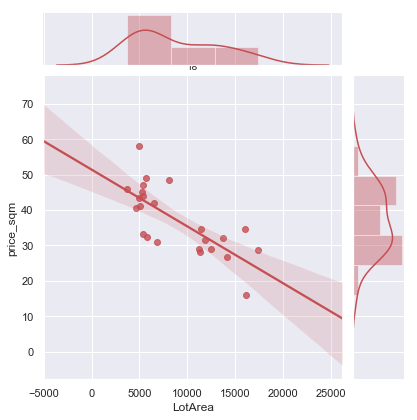

     LotArea  price_sqm outtype
Id                             
770    53504  10.055323     sqm
     LotArea  price_sqm outtype
Id                             
770    53504  10.055323     sqm
      price_sqm  LotArea      resid
Id                                 
190   58.094658     4923  42.850838
1098  45.995671     3696  34.551194
1289  49.081921     5664  31.543632
475   47.091932     5330  30.587857
173   45.043347     5306  28.613587
59    32.069873    13682 -10.295747
1047  34.664985    16056 -15.051606
337   26.660027    14157 -17.176407
179   28.803134    17423 -25.146303
1362  16.091100    16158 -33.941328


C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

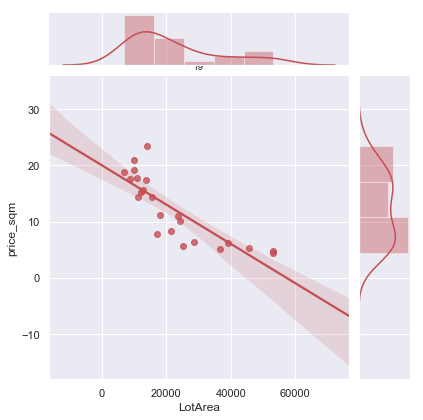

     LotArea  price_sqm outtype
Id                             
250   159000   1.742138     sqm
452    70761   3.956982     sqm
707   115149   2.622689     sqm
     LotArea  price_sqm outtype
Id                             
250   159000   1.742138     sqm
707   115149   2.622689     sqm
     LotArea  price_sqm outtype
Id                             
683     2887  59.923796   price
     LotArea  price_sqm outtype
Id                             
352     5271  36.046291   price
683     2887  59.923796   price
      price_sqm  LotArea      resid
Id                                 
1066  23.428571    14000  19.228220
177   21.038987    10029  18.030035
359   18.759019     6930  16.679845
280   19.190405    10005  16.188653
819   17.581670     8816  14.936648
272    6.175839    39104  -5.556344
1288   5.205479    36500  -5.745438
849    5.263158    45600  -8.417988
458    4.809589    53227 -11.159848
385    4.519178    53107 -11.414256


C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


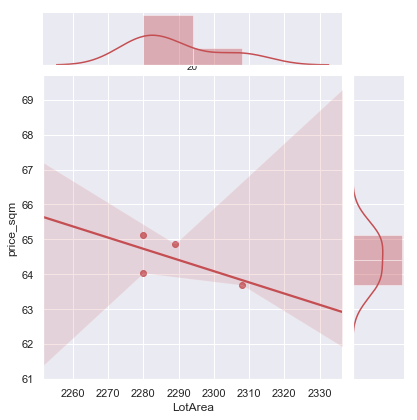

      LotArea  price_sqm outtype
Id                              
127      4928  25.974026     sqm
551      4043  34.627752     sqm
1422     4043  31.535988     sqm
1432     4928  29.170049     sqm
     LotArea  price_sqm outtype
Id                             
963     2308  67.157712   price
      price_sqm  LotArea     resid
Id                                
196   65.131579     2280  0.961941
676   64.875491     2289  0.452552
1161  64.035088     2280 -0.134551
505   63.691508     2308 -1.266179
196   65.131579     2280  0.961941
676   64.875491     2289  0.452552
1161  64.035088     2280 -0.134551
505   63.691508     2308 -1.266179


C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


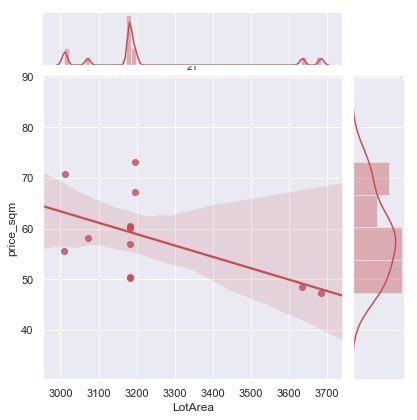

      LotArea  price_sqm outtype
Id                              
444      3922  43.982662     sqm
598      3922  49.515808     sqm
640      3982  66.439227     sqm
1395     4045  60.958714     sqm
      price_sqm  LotArea      resid
Id                                 
1020  70.856289     3013  16.728035
560   73.216521     3196  15.800689
852   67.271589     3196   9.855758
230   60.496543     3182   3.332220
386   60.339409     3182   3.175086
1005  56.882464     3182  -0.281859
791   50.345695     3182  -6.818628
983   50.249843     3182  -6.914480
1416  48.390646     3635 -16.911778
1127  47.231270     3684 -18.951434


C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

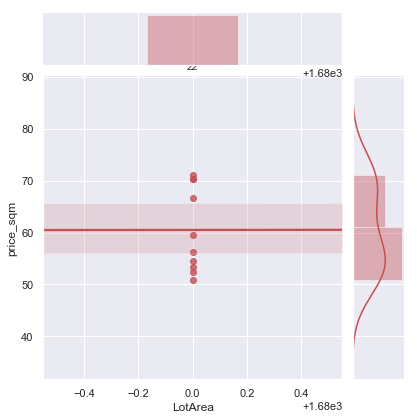

      LotArea  price_sqm outtype
Id                              
228      1869  56.714821     sqm
433      1920  63.802083     sqm
501      1890  59.788360     sqm
1105     2016  52.579365     sqm
1335     2368  52.787162     sqm
1379     1953  42.498720     sqm
      LotArea  price_sqm outtype
Id                              
1335     2368  52.787162     sqm
      price_sqm  LotArea      resid
Id                                 
1292  71.130952     1680  10.630952
364   70.238095     1680   9.738095
1030  70.238095     1680   9.738095
226   66.666667     1680   6.166667
838   59.523810     1680  -0.976190
233   56.250000     1680  -4.250000
1220  54.464286     1680  -6.035714
236   53.273810     1680  -7.226190
656   52.380952     1680  -8.119048
431   50.833333     1680  -9.666667


C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


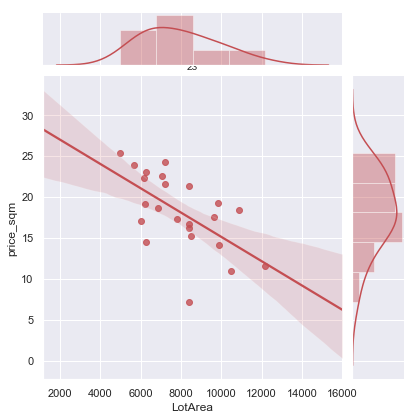

      LotArea  price_sqm outtype
Id                              
1032    15863  12.418836     sqm
     LotArea  price_sqm outtype
Id                             
682     4500  35.429778   price
      price_sqm  LotArea      resid
Id                                 
381   25.400000     5000  14.914096
292   23.896606     5687  11.969939
577   23.045137     6292   9.849675
1400  22.273538     6171   9.331835
800   24.305556     7200   9.205854
636   18.355360    10896  -4.495522
824   14.090909     9900  -6.671180
1101   7.142857     8400 -10.473461
407   10.973282    10480 -11.005172
841   11.517894    12155 -13.973338


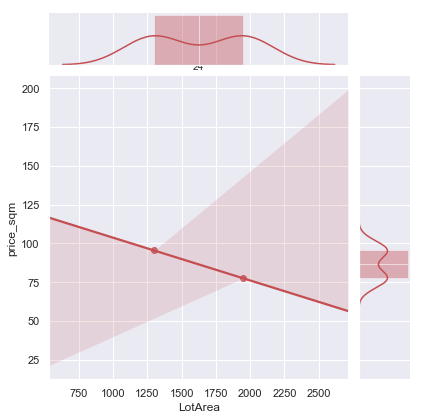

     price_sqm  LotArea      resid
Id                                
957  95.384615     1300  30.295858
600  77.435897     1950 -20.197239
957  95.384615     1300  30.295858
600  77.435897     1950 -20.197239


In [155]:
for idx,group in enumerate(df1.groupby(['Neighborhood'])):
    df_outliers_1 = pd.DataFrame()
    df_outliers_2 = pd.DataFrame()
    df_outliers_3 = pd.DataFrame()
    df_outliers_4 = pd.DataFrame()
    
    name_l = group[0]
    df_aux = group[1].copy()
    
    df_aux = df_aux[~((df_aux.LotArea == 0) | (df_aux.SalePrice == 0))]
    df_aux['price_sqm'] = df_aux.apply(lambda x: x.SalePrice / x.LotArea, axis=1) #price per sqm
    
    # remove outliers of area
    
    outliers_z_ar = outliers_modified_z_score(df_aux.LotArea.tolist())
    outliers_iqr_er_ar = outliers_iqr(df_aux.LotArea.tolist())
    
    if len(outliers_z_ar[0]) > 0:
        df_outliers_1 = df_aux.iloc[outliers_z_ar[0]]
        df_outliers_1['outtype'] ="sqm"

    if len(outliers_iqr_er_ar[0]) > 0:
        df_outliers_2 = df_aux.iloc[outliers_iqr_er_ar[0]]
        df_outliers_2['outtype'] ="sqm"

    if not df_outliers_1.empty:
        df_aux = df_aux[~df_aux.Id.isin(df_outliers_1.Id)]
        df_outliers_1.set_index('Id', inplace=True, drop=True)
    if not df_outliers_2.empty:
        df_aux = df_aux[~df_aux.Id.isin(df_outliers_2.Id)]
        df_outliers_2.set_index('Id', inplace=True, drop=True)

     # remove outliers of psqm
    
    outliers_z_ps = outliers_modified_z_score(df_aux.price_sqm.tolist())
    outliers_iqr_er_ps = outliers_iqr(df_aux.price_sqm.tolist())
    
    if len(outliers_z_ps[0]) > 0:
        df_outliers_3 = df_aux.iloc[outliers_z_ps[0]]
        df_outliers_3['outtype'] ="price"
    
    if len(outliers_iqr_er_ps[0]) > 0:
        df_outliers_4 = df_aux.iloc[outliers_iqr_er_ps[0]]
        df_outliers_4['outtype'] ="price"

    if not df_outliers_3.empty:
        df_aux = df_aux[~df_aux.Id.isin(df_outliers_3.Id)]
        df_outliers_3.set_index('Id', inplace=True, drop=True)
    if not df_outliers_4.empty:
        df_aux = df_aux[~df_aux.Id.isin(df_outliers_4.Id)]
        df_outliers_4.set_index('Id', inplace=True, drop=True)

    sns.set(style="darkgrid", color_codes=True)

    d = df_aux[['Id','price_sqm','LotArea']].copy()

    d.set_index('Id', inplace=True, drop=True)
    model = sm.OLS(d.price_sqm, d.LotArea)
    #model = sm.RLM(d.price_sqm, d.area, M=sm.robust.norms.HuberT())
    d['resid'] = model.fit().resid
    
    
    sns.jointplot(y='price_sqm', x='LotArea', data=d, kind="reg", color="r")

    
    head = d.sort_values(by=['resid'], ascending=[False]).head(5)
    tail = d.sort_values(by=['resid'], ascending=[False]).tail(5)
    

    plt.title(name_l, fontsize=10)
    plt.show()
        
    if not df_outliers_1.empty:
        print(df_outliers_1[['LotArea','price_sqm','outtype']])
    if not df_outliers_2.empty:
        print(df_outliers_2[['LotArea','price_sqm','outtype']])
    if not df_outliers_3.empty:
        print(df_outliers_3[['LotArea','price_sqm','outtype']])
    if not df_outliers_4.empty:
        print(df_outliers_4[['LotArea','price_sqm','outtype']])
        
    print(pd.concat([head,tail]))
    
        
    if not df_outliers_1.empty:
        tot=pd.DataFrame(df_outliers_1[['LotArea','price_sqm','outtype']])
    if not df_outliers_2.empty:
        if not df_outliers_1.empty:
            tot=tot.append(df_outliers_2[['LotArea','price_sqm','outtype']])
        else:
            tot=pd.DataFrame(df_outliers_2[['LotArea','price_sqm','outtype']])
    if not df_outliers_3.empty:
        if not df_outliers_2.empty:
            tot=tot.append(df_outliers_3[['LotArea','price_sqm','outtype']])
        else:
            tot=pd.DataFrame(df_outliers_3[['LotArea','price_sqm','outtype']])
    if not df_outliers_4.empty:
        if not df_outliers_3.empty:
            tot=tot.append(df_outliers_4[['LotArea','price_sqm','outtype']])
        else:
            tot=pd.DataFrame(df_outliers_4[['LotArea','price_sqm','outtype']])
    tot_outliers=tot_outliers.append(tot)

In [156]:
tot_outliers.drop_duplicates(inplace=True)

In [157]:
tot_outliers.reset_index(inplace=True)
tot_outliers

,Id,LotArea,price_sqm,outtype
0,140,15426,15.007131,sqm
1,291,15611,14.940106,sqm
2,302,16226,16.455072,sqm
3,783,16285,11.489100,sqm
4,848,15523,8.600142,sqm
5,204,4438,33.573682,sqm
6,594,4435,31.567080,sqm
7,691,4426,31.857207,sqm
8,722,4426,32.309083,sqm
9,812,4438,32.559712,sqm


In [158]:
df1.shape

(1460, 102)

In [159]:
df1 = df1[~df1.Id.isin(tot_outliers.Id)]

In [160]:
df1.shape

(1320, 102)

# Multicollinearity Test

In [161]:
def get_vif(exogs,data):
    import statsmodels.formula.api as smf
    vif_array=np.array([])
    tolerance_array=np.array([])
    
    for exog in exogs:
        not_exog=[i for i in exogs if i!=exog]
        formula=f"{exog} ~ {' + '.join(not_exog)}"
        
        r_squared=smf.ols(formula,data=data).fit().rsquared
        
        vif=1/(1-r_squared)
        vif_array=np.append(vif_array,vif).round(2)
        
        tolerance=1-r_squared
        tolerance_array=np.append(tolerance_array,tolerance).round(2)
    df_vif=pd.DataFrame({'VIF':vif_array,'Tolerance':tolerance_array},index=exogs)
    
    return df_vif

In [162]:
y=df1.SalePrice

In [163]:
df1._get_numeric_data().iloc[:,~df1._get_numeric_data().columns.isin(['Id','SalePrice'])]

,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,65.0,8450,0,0,7,5,2003,2003,196.0,...,0,0,0,0,0,0,0,0,0,0
1,20,80.0,9600,0,1,6,8,1976,1976,0.0,...,0,0,0,0,0,0,0,0,0,1
2,60,68.0,11250,1,0,7,5,2001,2002,162.0,...,0,0,0,0,0,0,0,0,0,0
3,70,60.0,9550,1,2,7,5,1915,1970,0.0,...,0,0,0,0,0,0,0,0,0,0
4,60,84.0,14260,1,3,8,5,2000,2000,350.0,...,1,0,0,0,0,0,0,0,0,0
5,50,85.0,14115,1,4,5,5,1993,1995,0.0,...,0,0,0,0,0,0,0,0,0,0
6,20,75.0,10084,0,5,8,5,2004,2005,186.0,...,0,0,0,0,0,0,1,0,0,0
7,60,0.0,10382,1,6,7,6,1973,1973,240.0,...,0,0,0,0,0,0,0,0,0,0
8,50,51.0,6120,0,7,7,5,1931,1950,0.0,...,0,0,1,0,0,0,0,0,0,0
9,190,50.0,7420,0,8,5,6,1939,1950,0.0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
df1.columns.isin(['Id','SalePrice'])

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [165]:
X=df1.iloc[:,~df1.columns.isin(['Id','SalePrice'])]._get_numeric_data()
X.shape

(1320, 70)

In [166]:
#get_vif(exogs=X.columns,data=X)

In [167]:
X.isna().sum()[X.isna().sum()>0] #check if I have nans
X.dropna(inplace=True) #drop nans
X.isna().sum()[X.isna().sum()>0] #verify that no more nans in DF


Series([], dtype: int64)

In [168]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
X=X.assign(const=1)
cols_to_drop=pd.Series([vif(X.values,i) for i in range(X.shape[1])],index=X.columns)

C:\Users\eldiy\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\eldiy\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [169]:
X.drop('Neighborhood',axis=1,inplace=True)

In [170]:
cols_to_drop=pd.Series([vif(X.values,i) for i in range(X.shape[1])],index=X.columns)

In [171]:
X.drop('TotalBsmtSF',axis=1,inplace=True)

In [172]:
cols_to_drop=pd.Series([vif(X.values,i) for i in range(X.shape[1])],index=X.columns)

In [173]:
X.drop('GrLivArea',axis=1,inplace=True)

In [174]:
cols_to_drop=pd.Series([vif(X.values,i) for i in range(X.shape[1])],index=X.columns)

In [175]:
cols_to_drop[cols_to_drop>10]

MSZone_FV               1.502999e+01
MSZone_RL               4.043319e+01
MSZone_RM               2.435338e+01
Neighborhood_CollgCr    1.224001e+01
Neighborhood_NAmes      2.118574e+01
Neighborhood_OldTown    1.466041e+01
Neighborhood_Somerst    1.013246e+01
const                   2.491536e+06
dtype: float64

In [176]:
print(X.shape[0]-y.shape[0])

-86


In [177]:
y=y[y.index.isin(X.index)]

In [178]:
print(X.shape[0]-y.shape[0])

0


In [61]:
data=pd.concat([X,y],axis=1)

In [62]:
data.rename(index=str, columns={'1stFlrSF':'FFlrSF','2ndFlrSF':'SFlrSF','3SsnPorch':'SsnPorch'},inplace=True)
data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'FFlrSF', 'SFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZone_FV', 'MSZone_RH', 'MSZone_RL', 'MSZone_RM',
       'lotconf_CulDSac', 'lotconf_FR2', 'lotconf_FR3', 'lotconf_Inside',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVil

In [63]:
import statsmodels.formula.api as smf

Xs=data[[i for i in data.columns if i!='SalePrice']]
results=smf.ols(f"SalePrice ~ {' + '.join(Xs.columns)}",data=data).fit()

In [64]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     151.6
Date:                Wed, 19 Jun 2019   Prob (F-statistic):               0.00
Time:                        09:48:13   Log-Likelihood:                -14228.
No. Observations:                1234   AIC:                         2.859e+04
Df Residuals:                    1166   BIC:                         2.894e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -5.056e+05   5.69e+05     -0.889      0.374   -1.62e+06    6.11e+05
MSSubClass            -180.5483     28.491     -6.337      0.000    -236.448    -124.649
LotFrontage             56.0896     25.395      2.209      0.027       6.265     105.915
LotArea                  0.6542      0.100      6.564      0.000       0.459       0.850
LotShape              -668.1399   1564.479     -0.427      0.669   -3737.648    2401.368
OverallQual           1.176e+04   1058.606     11.105      0.000    9678.576    1.38e+04
OverallCond           6627.9853    896.675      7.392      0.000    4868.709    8387.262
YearBuilt              403.1164     77.011      5.235      0.000     252.021     554.212
YearRemodAdd            62.0571     59.524      1.043      0.297     -54.730     178.844
MasVnrArea              27.6202      5.010      5.513      0.000      17.790      37.450
BsmtFinSF1              35.9415      3.998      8.990      0.000      28.098      43.785
BsmtFinSF2              21.0083      5.660      3.711      0.000       9.902      32.114
BsmtUnfSF               15.6980      3.551      4.420      0.000       8.731      22.665
FFlrSF                  56.0870      4.909     11.426      0.000      46.456      65.718
SFlrSF                  56.9392      4.433     12.844      0.000      48.241      65.637
LowQualFinSF             2.7325     20.284      0.135      0.893     -37.064      42.530
BsmtFullBath           394.7334   2176.979      0.181      0.856   -3876.500    4665.967
BsmtHalfBath          1939.5871   3402.821      0.570      0.569   -4736.749    8615.924
FullBath              1307.0976   2542.374      0.514      0.607   -3681.042    6295.237
HalfBath              -280.5717   2306.998     -0.122      0.903   -4806.904    4245.760
BedroomAbvGr         -8864.9008   1487.822     -5.958      0.000   -1.18e+04   -5945.793
KitchenAbvGr         -1.586e+04   4839.121     -3.278      0.001   -2.54e+04   -6366.879
TotRmsAbvGrd          3899.7840   1046.243      3.727      0.000    1847.055    5952.513
Fireplaces             908.7945   1478.602      0.615      0.539   -1992.224    3809.812
GarageYrBlt             62.5090     64.365      0.971      0.332     -63.776     188.794
GarageCars            7911.3531   2464.164      3.211      0.001    3076.661    1.27e+04
GarageArea               3.7585      8.496      0.442      0.658     -12.910      20.427
WoodDeckSF              10.4940      6.492      1.616      0.106      -2.243      23.231
OpenPorchSF             18.5913     13.482      1.379      0.168      -7.861      45.044
EnclosedPorch            4.7683     13.643      0.350      0.727     -21.999      31.536
SsnPorch               -21.5071     24.675     -0.872      0.384     -69.920      26.906
ScreenPorch             29.6437     13.963      2.123    

In [65]:
LotShape, YearRemodAdd, LowQualFinSF, BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,
Fireplaces,GarageYrBlt, WoodDeckSF, OpenPorchSF,EnclosedPorch, SsnPorch,
MiscVal, MoSold,YrSold, lotconf_CulDSac,lotconf_FR2,lotconf_FR3,lotconf_Inside,
Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_ClearCr, Neighborhood_CollgCr,
Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_MeadowV,Neighborhood_Mitchel,
Neighborhood_NAmes,Neighborhood_NPkVill, Neighborhood_OldTown,Neighborhood_SWISU,
Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst, Neighborhood_Timber,
Neighborhood_Veenker,const

NameError: name 'LotShape' is not defined

In [ ]:
data.drop(['YearRemodAdd','const'],axis=1,inplace=True)
data.drop(['LotShape','LowQualFinSF'],axis=1,inplace=True)
data.drop('BsmtFullBath',axis=1,inplace=True)
data.drop('HalfBath',axis=1,inplace=True)
data.drop(['FullBath','BsmtHalfBath'],axis=1,inplace=True)
data.drop(['GarageYrBlt','EnclosedPorch'],axis=1,inplace=True)
data.drop('SsnPorch',axis=1,inplace=True)
data.drop(['MiscVal','MoSold'],axis=1,inplace=True)
data.drop(['YrSold','lotconf_Inside'],axis=1,inplace=True)
data.drop(['lotconf_FR2','lotconf_FR3'],axis=1,inplace=True)
data.drop(['Neighborhood_Blueste','Neighborhood_SWISU'],axis=1,inplace=True)
data.drop(['Neighborhood_BrDale','Neighborhood_NPkVill'],axis=1,inplace=True)
data.drop('Fireplaces',axis=1,inplace=True)
data.drop(['GarageArea','PoolArea'],axis=1,inplace=True)
data.drop(['OpenPorchSF','Neighborhood_ClearCr'],axis=1,inplace=True)
data.drop(['Neighborhood_Somerst','Neighborhood_OldTown','Neighborhood_Edwards'],axis=1,inplace=True)
data.drop(['Neighborhood_Veenker','Neighborhood_Timber'],axis=1,inplace=True)
data.drop(['Neighborhood_Sawyer','Neighborhood_CollgCr'],axis=1,inplace=True)
data.drop(['MSZone_RH','Neighborhood_Gilbert','Neighborhood_Mitchel'],axis=1,inplace=True)
data.drop(['Neighborhood_SawyerW','lotconf_CulDSac','MSZone_RM'],axis=1,inplace=True)
data.drop('Neighborhood_IDOTRR',axis=1,inplace=True)
data.drop('Neighborhood_MeadowV',axis=1,inplace=True)
data.drop('MSZone_RL',axis=1,inplace=True)
data.drop('Neighborhood_BrkSide',axis=1,inplace=True)




In [ ]:
Xs=data[[i for i in data.columns if i!='SalePrice']]
results=smf.ols(f"SalePrice ~ {' + '.join(Xs.columns)}",data=data).fit()
results.summary()

In [ ]:
plt.plot(results.resid)

In [ ]:
y_pred=pd.Series(results.predict(Xs))
y_pred.index=y_pred.index.astype(int)
comp_df=pd.DataFrame([y_pred,y]).T
plt.scatter(comp_df['Unnamed 0'],comp_df.SalePrice)

# PCA

In [101]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model=LinearRegression()

rfe=RFE(model,40)
rfe=rfe.fit(X,np.log(y))

print(rfe.support_)
print(rfe.ranking_)

[False False False False  True  True False False False False False False
 False False False  True  True  True  True  True  True  True  True False
  True False False False False False False False False False False  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True False  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True False]
[11 15 27  2  1  1  6  7 26 18 19 20 10 13 24  1  1  1  1  1  1  1  1  9
  1 23 22 17 21 25 14 16 28 12  5  1  1  1  1  1  1  1  3  1  1  1  1  1
  1  1  8  1  1  1  1  1  4  1  1  1  1  1  1  1  1  1  1 29]


In [83]:
X.columns[4]

'OverallQual'

In [106]:
print(X.columns[rfe.support_])
X_new=X[X.columns[rfe.support_]]
X_new1=pd.concat([X_new,y],axis=1)

Index(['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'MSZone_FV', 'MSZone_RH', 'MSZone_RL',
       'MSZone_RM', 'lotconf_CulDSac', 'lotconf_FR2', 'lotconf_FR3',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker'],
      dtype='object')


In [103]:
import statsmodels.formula.api as smf

Xs=X_new[[i for i in X_new.columns if i!='SalePrice']]
results=smf.ols(f"np.log(SalePrice) ~ {' + '.join(Xs.columns)}",data=X_new).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(SalePrice)   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     216.8
Date:                Wed, 19 Jun 2019   Prob (F-statistic):               0.00
Time:                        10:19:45   Log-Likelihood:                 752.00
No. Observations:                1234   AIC:                            -1422.
Df Residuals:                    1193   BIC:                            -1212.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               10.2887      0.078    132.187      0.000      10.136      10.441
OverallQual              0.0971      0.005     19.246      0.000       0.087       0.107
OverallCond              0.0426      0.004     10.584      0.000       0.035       0.050
BsmtFullBath             0.0957      0.008     11.314      0.000       0.079       0.112
BsmtHalfBath             0.0494      0.017      2.880      0.004       0.016       0.083
FullBath                 0.1083      0.012      9.270      0.000       0.085       0.131
HalfBath                 0.0416      0.009      4.460      0.000       0.023       0.060
BedroomAbvGr            -0.0185      0.007     -2.502      0.012      -0.033      -0.004
KitchenAbvGr            -0.1798      0.023     -7.976      0.000      -0.224      -0.136
TotRmsAbvGrd             0.0470      0.005     10.334      0.000       0.038       0.056
Fireplaces               0.0588      0.007      8.104      0.000       0.045       0.073
GarageCars               0.0880      0.009     10.220      0.000       0.071       0.105
MSZone_FV                0.3489      0.072      4.817      0.000       0.207       0.491
MSZone_RH                0.2666      0.075      3.555      0.000       0.119       0.414
MSZone_RL                0.3866      0.062      6.198      0.000       0.264       0.509
MSZone_RM                0.3404      0.057      6.002      0.000       0.229       0.452
lotconf_CulDSac          0.0301      0.017      1.798      0.072      -0.003       0.063
lotconf_FR2             -0.0568      0.023     -2.440      0.015      -0.102      -0.011
lotconf_FR3             -0.1407      0.069     -2.053      0.040      -0.275      -0.006
Neighborhood_Blueste    -0.1601      0.099     -1.611      0.108      -0.355       0.035
Neighborhood_BrDale     -0.2107      0.055     -3.850      0.000      -0.318      -0.103
Neighborhood_BrkSide    -0.0481      0.035     -1.390      0.165      -0.116       0.020
Neighborhood_ClearCr     0.1617      0.031      5.137      0.000       0.100       0.223
Neighborhood_CollgCr     0.0981      0.017      5.742      0.000       0.065       0.132
Neighborhood_Crawfor     0.1064      0.024      4.353      0.000       0.058       0.154
Neighborhood_Edwards    -0.0541      0.023     -2.403      0.016      -0.098      -0.010
Neighborhood_IDOTRR     -0.0567      0.043     -1.332      0.183      -0.140       0.027
Neighborhood_MeadowV    -0.1267      0.050     -2.532      0.011      -0.225      -0.029
Neighborhood_Mitchel     0.0449      0.027      1.663      0.097      -0.008       0.098
Neighborhood_NAmes       0.0235      0.017      1.381      0.168      -0.010       0.057
Neighborhood_NPkVill    -0.1314      0.049     -2.682      0.007      -0.227      -0.035
Neighborhood_NoRidge     0.2230      0.025      8.747    

In [95]:
from statsmodels.multivariate.pca import PCA

In [113]:
pc=PCA(np.array(X_new),ncomp=10)
pd.DataFrame(pc.factors)

,0,1,2,3,4,5,6,7,8,9
0,-0.022687,-0.003560,-0.001221,0.003338,0.024187,-0.050111,-0.002842,0.012548,0.013760,0.003827
1,-0.002317,-0.022838,0.000213,-0.007973,-0.088689,-0.043306,-0.067464,-0.091934,0.124217,-0.191015
2,-0.021788,-0.008042,-0.006922,0.013329,0.012240,-0.041234,-0.001391,0.015133,0.014220,0.003024
3,-0.015214,-0.013716,0.006594,0.011091,-0.031428,0.050395,-0.003626,0.010873,0.036746,0.014404
4,-0.057743,0.006203,0.025748,-0.002109,-0.023935,-0.051874,0.011560,-0.018437,-0.003089,-0.111087
5,0.015339,-0.023380,-0.035473,0.033571,0.029856,0.010781,0.049010,-0.039087,0.004170,-0.007546
6,-0.024868,0.020369,-0.039946,-0.007757,-0.000341,0.020235,0.000769,-0.010144,-0.006501,0.007575
7,-0.024451,-0.005727,0.007123,0.012334,-0.024246,0.014250,0.010274,0.009243,-0.006420,-0.005756
8,0.012982,0.065363,0.064186,0.017970,0.041964,0.040257,-0.008469,-0.054048,0.004593,-0.007559
9,0.029334,-0.006114,0.017938,0.018821,0.006206,0.051581,-0.011287,-0.024959,0.012677,-0.003864


In [115]:
X_new1=pd.concat([pd.DataFrame(pc.factors),y],axis=1)
X_new1.columns=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','SP']

Xs=X_new1[[i for i in X_new1.columns if i!='SP']]
results=smf.ols(f"np.log(SP) ~ {' + '.join(Xs.columns)}",data=X_new1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(SP)   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.162
Date:                Wed, 19 Jun 2019   Prob (F-statistic):              0.313
Time:                        10:29:17   Log-Likelihood:                -473.00
No. Observations:                1051   AIC:                             968.0
Df Residuals:                    1040   BIC:                             1023.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0447      0.012   1022.886      0.000      12.022      12.068
F1            -0.9375      0.414     -2.264      0.024      -1.750      -0.125
F2             0.0062      0.412      0.015      0.988      -0.802       0.814
F3            -0.5765      0.412     -1.400      0.162      -1.384       0.231
F4            -0.6046      0.407     -1.486      0.138      -1.403       0.194
F5            -0.1341      0.410     -0.327      0.744      -0.939       0.671
F6            -0.0984      0.411     -0.239      0.811      -0.905       0.708
F7            -0.3119      0.410     -0.761      0.447      -1.116       0.493
F8             0.3201      0.414      0.772      0.440      -0.493       1.133
F9             0.0975      0.417      0.234      0.815      -0.721       0.916
F10            0.4304      0.419      1.028      0.304      -0.392       1.252
==============================================================================
Omnibus:                       23.608   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.347
Skew:                           0.263   Prob(JB):                     2.57e-07
Kurtosis:                       3.645   Cond. No.                         36.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [181]:
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZone_FV', 'MSZone_RH', 'MSZone_RL', 'MSZone_RM',
       'lotconf_CulDSac', 'lotconf_FR2', 'lotconf_FR3', 'lotconf_Inside',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_N

In [186]:
X['TotalNumberBath']=X[['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']].sum(axis=1)

In [187]:
X.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],axis=1,inplace=True)

In [192]:
X[['TotRmsAbvGrd','KitchenAbvGr','BedroomAbvGr','TotalNumberBath']].corr()

,TotRmsAbvGrd,KitchenAbvGr,BedroomAbvGr,TotalNumberBath
TotRmsAbvGrd,1.000000,0.240138,0.656568,0.503555
KitchenAbvGr,0.240138,1.000000,0.167937,-0.012730
BedroomAbvGr,0.656568,0.167937,1.000000,0.288997
TotalNumberBath,0.503555,-0.012730,0.288997,1.000000


In [193]:
X.drop(['BedroomAbvGr','TotalNumberBath'],axis=1,inplace=True)

In [196]:
X.rename(index=str, columns={'1stFlrSF':'FFlrSF','2ndFlrSF':'SFlrSF','3SsnPorch':'SsnPorch'},inplace=True)
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'FFlrSF', 'SFlrSF', 'LowQualFinSF',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZone_FV', 'MSZone_RH', 'MSZone_RL', 'MSZone_RM',
       'lotconf_CulDSac', 'lotconf_FR2', 'lotconf_FR3', 'lotconf_Inside',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt

In [208]:
X.YearBuilt=np.log(X.YearBuilt)
X.YrSold=np.log(X.YrSold)
X.YearRemodAdd=np.log(X.YearRemodAdd)
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,const
0,60,65.0,8450,0,7,5,-0.346330,7.602401,196.0,706,...,0,0,0,0,0,0,0,0,0,1
1,20,80.0,9600,0,6,8,-0.347577,7.588830,0.0,978,...,0,0,0,0,0,0,0,0,1,1
2,60,68.0,11250,1,7,5,-0.346422,7.601902,162.0,486,...,0,0,0,0,0,0,0,0,0,1
3,70,60.0,9550,1,7,5,-0.350476,7.585789,0.0,216,...,0,0,0,0,0,0,0,0,0,1
4,60,84.0,14260,1,8,5,-0.346468,7.600902,350.0,655,...,0,0,0,0,0,0,0,0,0,1


In [209]:
model=LinearRegression()

rfe=RFE(model,40)
rfe=rfe.fit(X,np.log(y))

print(rfe.support_)
print(rfe.ranking_)

[False False False  True  True  True  True  True False False False False
 False False False  True  True  True False  True False False False False
 False False False False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True False  True  True  True
  True  True False]
[ 5  9 22  1  1  1  1  1 21 12 16 17  3  6 18  1  1  1  2  1 19 15 11 13
 20  7  8 23  4  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 14  1  1  1  1  1  1  1 10  1  1  1  1  1 24]


In [219]:
print(X.columns[rfe.support_])
X_new_2=pd.concat([X[X.columns[rfe.support_]],X.LotArea],axis=1)

Index(['LotShape', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'YrSold',
       'MSZone_FV', 'MSZone_RH', 'MSZone_RL', 'MSZone_RM', 'lotconf_CulDSac',
       'lotconf_FR2', 'lotconf_FR3', 'lotconf_Inside', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker'],
      dtype='object')


In [221]:
pc=PCA(np.array(X_new),ncomp=5)
X_new1=pd.concat([pd.DataFrame(pc.factors),y],axis=1)
X_new1.columns=['F1','F2','F3','F4','F5','SP']

Xs=X_new1[[i for i in X_new1.columns if i!='SP']]
results=smf.ols(f"np.log(SP) ~ {' + '.join(Xs.columns)}",data=X_new1).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(SP)   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.864
Date:                Wed, 19 Jun 2019   Prob (F-statistic):             0.0979
Time:                        11:05:07   Log-Likelihood:                -474.17
No. Observations:                1051   AIC:                             960.3
Df Residuals:                    1045   BIC:                             990.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0445      0.012   1024.665      0.000      12.021      12.068
F1            -0.9320      0.414     -2.254      0.024      -1.743      -0.121
F2             0.0208      0.411      0.050      0.960      -0.786       0.827
F3            -0.5696      0.411     -1.386      0.166      -1.376       0.237
F4            -0.5978      0.406     -1.472      0.141      -1.395       0.199
F5            -0.1397      0.410     -0.341      0.733      -0.943       0.664
==============================================================================
Omnibus:                       23.544   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.933
Skew:                           0.266   Prob(JB):                     3.16e-07
Kurtosis:                       3.633   Cond. No.                         35.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""